### Importing libraries and settingfigure parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from scipy.spatial.distance import pdist
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy.integrate import quad

plt.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
        'axes.linewidth': 2,
        'lines.linewidth': 2,
        'figure.figsize': (6,4)      # adjust this value to resize the figure (width, height)
    })
plt.rc('font', size=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

#### Function to plot normal distribution with given mean and standard deviation.

In [2]:
def plot_normal_distribution(mean, std_dev, num_points=1000):
    # Generate data points for the normal distribution
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, num_points)
    y = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2 / (2*std_dev**2))

    # Plot the normal distribution
    plt.plot(x, y)
    plt.axvline(mean, linestyle='--', color='r')
    
    # Add vertical lines for 1, 2, 3, and 4 standard deviations
    for i in range(1, 5):
        plt.axvline(mean + i*std_dev, linestyle='--', color='r')
        plt.axvline(mean - i*std_dev, linestyle='--', color='r')

    # Calculate and print the percentages within 1, 2, 3, and 4 standard deviations
    cdf_values = [norm.cdf(mean + i*std_dev, loc=mean, scale=std_dev) - norm.cdf(mean - i*std_dev, loc=mean, scale=std_dev) for i in range(1, 5)]
    for i, percentage in enumerate(cdf_values, start=1):
        print(f'Percentage within {i} standard deviations: {percentage*100:.2f}%')

    plt.title('Normal Distribution with Standard Deviations')
    plt.xlabel(fr'$\mu={mean}$' + fr'$\quad\sigma={std_dev}$')
    plt.grid(True)
#     plt.yticks([])
    
    # Show ticks at integer multiples of standard deviation
    tick_positions = np.arange(-4, 5) * std_dev + mean
   
    # Add labels for 1, 2, 3, and 4 standard deviations on the top x-axis
    tick_labels = [f'{i}$\sigma$' if i != 0 else fr'$\mu$' for i in range(-4, 5)]
    plt.xticks(tick_positions, tick_labels)
    plt.show()

#### Function to calculate area under the curve for selected upper and lower multiples of standard deviation.

In [3]:
def area_under_curve(mean, std_dev, lower_multiple, upper_multiple):
    # Define the range for integration
    lower_bound = mean - lower_multiple * std_dev
    upper_bound = mean + upper_multiple * std_dev

    # Define the PDF of the normal distribution
    pdf = lambda x: (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))

    # Integrate the PDF within the specified range
    area, _ = quad(pdf, lower_bound, upper_bound)
    print(f"Area under the curve between {lower_multiple} and {upper_multiple} standard deviations: {area:.4f}")
    return

#### Function to plot normal distribution with highlighted region for selected upper and lower multiples of standard deviation. for given mean and standard deviation.

In [11]:
def plot_normal_distribution(mean, std_dev, num_points=1000, highlight_range=None):
    # Generate data points for the normal distribution
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, num_points)
    y = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2 / (2*std_dev**2))

    # Plot the normal distribution
    plt.plot(x, y)
    plt.axvline(mean, linestyle='--', color='r')
    
    # Add vertical lines for 1, 2, 3, and 4 standard deviations
    for i in range(1, 5):
        plt.axvline(mean + i*std_dev, linestyle='--', color='r')
        plt.axvline(mean - i*std_dev, linestyle='--', color='r')

    # Highlight the area under the curve for the specified range
    if highlight_range is not None:
        lower_multiple, upper_multiple = highlight_range
        x_fill = np.linspace(lower_multiple, upper_multiple, num_points)
        y_fill = norm.pdf(x_fill, loc=mean, scale=std_dev)
        plt.fill_between(x_fill, y_fill, color='yellow', alpha=0.3)

    plt.title('Normal Distribution with Standard Deviations')
    plt.xlabel(fr'$\mu={mean}$' + fr'$\quad\sigma={std_dev}$')
    plt.grid(True)
    
    # Show ticks at integer multiples of standard deviation
    tick_positions = np.arange(-4, 5) * std_dev + mean
   
    # Add labels for 1, 2, 3, and 4 standard deviations on the top x-axis
    tick_labels = [f'{i}$\sigma$' if i != 0 else fr'$\mu$' for i in range(-4, 5)]
    plt.xticks(tick_positions, tick_labels)
    plt.yticks([0,1])

    plt.show()


#### Defining mean, standard deviation, lower and upper bound to calculate probability. 

In [12]:
mean_value = 15
std_deviation = 4
lower_multiple = 3.5
upper_multiple = 1

#### Plotting normal distribution for the given mean and standard deviation

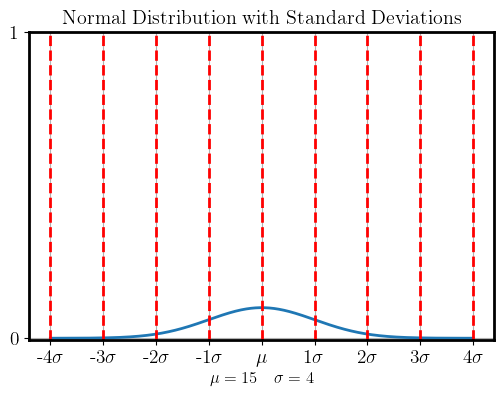

In [13]:
plot_normal_distribution(mean_value, std_deviation)

#### Plotting highlighted region for lower and upper bound.

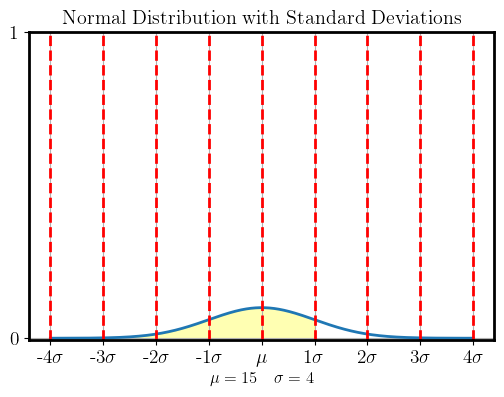

In [14]:
highlight_range = (mean_value - lower_multiple * std_deviation, mean_value + upper_multiple * std_deviation)
plot_normal_distribution(mean_value, std_deviation, highlight_range=highlight_range)

#### Calculating area under the curve for selected lower and upper bound which gives probability.

In [80]:
area_under_curve(mean_value, std_deviation, lower_multiple, upper_multiple)

Area under the curve between 3.5 and 1 standard deviations: 0.8411
